In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from random import seed
from random import randrange
from csv import reader
import scipy.stats as sps
import matplotlib.pyplot as plt
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn.model_selection import train_test_split

In [2]:
telcom= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Handling Missing Values

In [3]:
print ("Rows     : " , telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])

Rows     :  7043
Columns  :  21


In [4]:
# Data Types of the features
telcom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Find missing values for each feature
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Total charges column has space wherever customer hasn't paid anything so on conversion to numeric it becomes missing data
telcom.TotalCharges = pd.to_numeric(telcom.TotalCharges, errors='coerce')
telcom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Dropping null values from dataset
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

In [8]:
# Finding columns with missing values
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# No of rows reduce by 11
print ("Rows     : " , telcom.shape[0])

Rows     :  7032


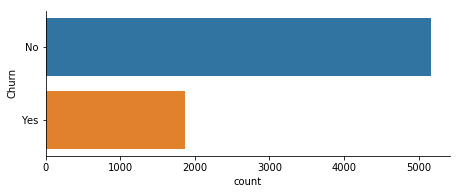

In [10]:
# Find the number of customers churned and who didn't churn
ax = sns.catplot(y="Churn", kind="count", data=telcom, height=2.6, aspect=2.5, orient='h')

Text(0.5, 1.0, '% of Churned')

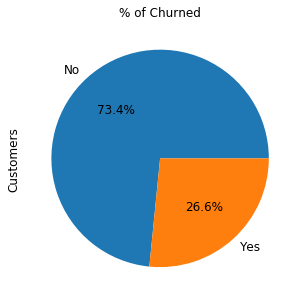

In [11]:
# Percentage of churn
ax = (telcom['Churn'].value_counts()*100.0 /len(telcom))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Customers',fontsize = 12)
ax.set_title('% of Churned', fontsize = 12)

In [12]:
#Converting the predictor variable in a binary numeric variable
telcom['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telcom['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [13]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

In [14]:
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})


In [15]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [16]:
#Remove customer IDs from the data set
telcom = telcom.iloc[:,1:]

In [17]:
telcom2= telcom.copy()

In [18]:
#convert all categorical features to dummy variables
df = pd.get_dummies(telcom2)
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


# 2. Data Analysis

## 2.1 Correlation Analysis

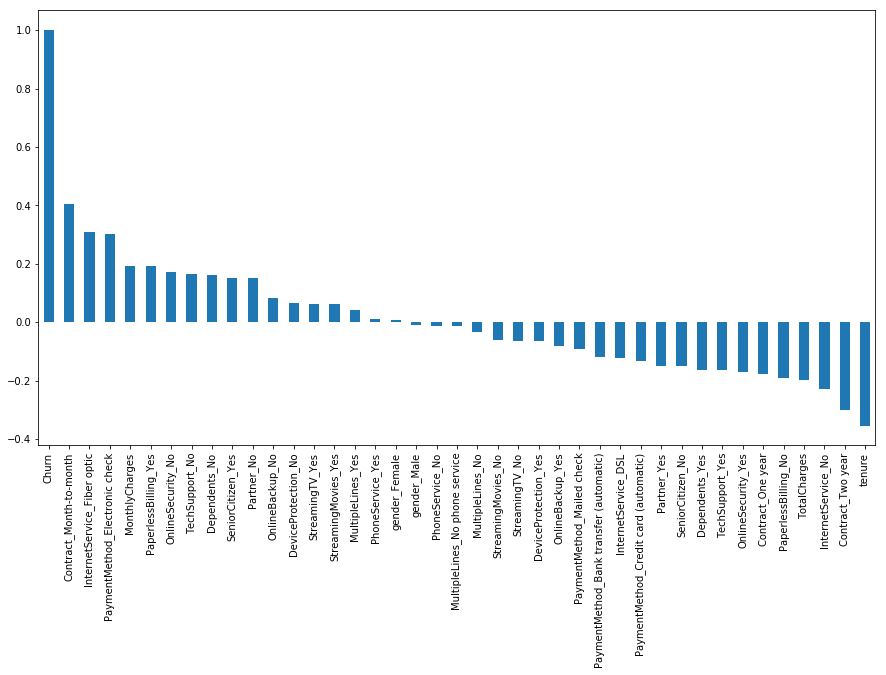

In [19]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## 2.2 Numerical Features

In [20]:
# Analysing the numerical features which are tenure, monthly charges and total charges by probability density function
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 0][feature].dropna(), color= 'green', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 1][feature].dropna(), color= 'red', label= 'Churn: Yes')


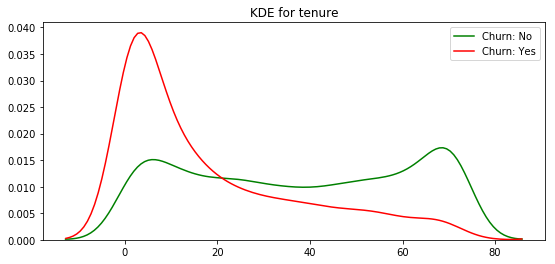

In [21]:
# KDE plot for tenure
kdeplot('tenure')

### Recent clients are highly likely to churn. Old customers have low probability of churning

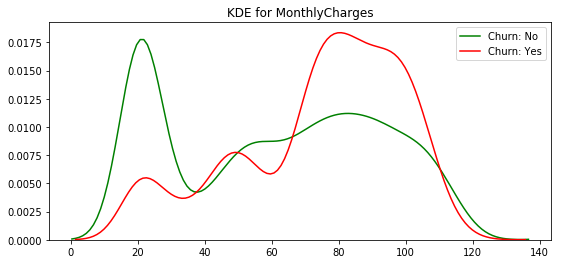

In [22]:
kdeplot('MonthlyCharges')

### Clients with higher monthly charges are more likely to churn as compared to those with lower monthly charges

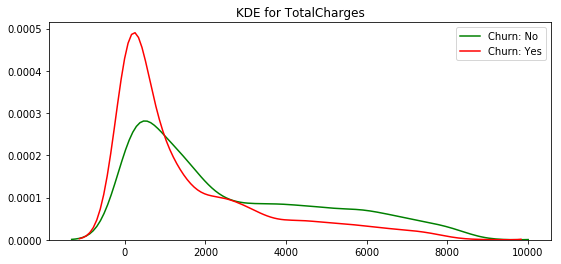

In [23]:
kdeplot('TotalCharges')

### The probability of churning and not churning is almost same throughout despite the varying total charges. Hence we can safely conclude that total charges doesn't affect churning much

## 2.3 Categorical Features

In [24]:
churn     = telcom[telcom["Churn"] == 1]

In [25]:
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
13,Male,No,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1
18,Female,No,Yes,Yes,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,1
20,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1
22,Male,No,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.15,20.15,1
26,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,1
27,Male,No,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,1


In [26]:
# Analysing categorical features by plotting pie chart

#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == 1]
not_churn = telcom[telcom["Churn"] == 0]

def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


In [27]:
plot_pie('gender')

### Gender hardly affects churning. Both are almost equally likely to churn

In [28]:
plot_pie('SeniorCitizen')

### Senior Citizens have more than double the churn rate than younger population.

In [29]:
plot_pie('Contract')

### The customers who have a month to month contract have a very high churn rate.

In [30]:
plot_pie('Partner')

### Customer with partners are more likely to churn

In [31]:
plot_pie('Dependents')

### People with dependents are more likely to churn

In [32]:
plot_pie('PhoneService')

In [33]:
plot_pie('MultipleLines')

###  Few customers doesn't have phone service. Customers with multiple lines have a slightly higher churn rate

In [34]:
plot_pie('InternetService')

### Clients without internet have a very low churn rate. Customers with fiber are more probable to churn than those with DSL connection

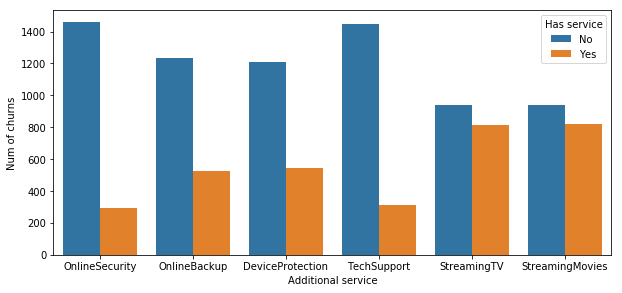

In [35]:
plt.figure(figsize=(10, 4.5))
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = telcom[(telcom.InternetService != "No") & (telcom.Churn == 1)]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

### Customers with the first 4 additionals (security to tech support) are more unlikely to churn. Streaming service is not predictive for churn

In [36]:
plot_pie('Contract')

### Short term contracts have higher churn rates

In [37]:
plot_pie('PaymentMethod')

### Customers with paperless billing are more probable to churn. The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate

In [38]:
plot_pie('PaperlessBilling')

### Customers with paperless billing are more probable to churn

## Removing features which don't affect churn

In [39]:
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Convert categorical to numerical before using models

In [40]:
data=telcom

In [41]:
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['SeniorCitizen'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)

In [42]:
telcom1= data.copy()

In [43]:
telcom1= telcom1.drop('gender', axis=1)
telcom1= telcom1.drop('TotalCharges', axis=1)
telcom1= telcom1.drop('StreamingTV', axis=1)
telcom1 = telcom1.drop('StreamingMovies', axis=1)
telcom1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,29.85,0
1,0,0,0,34,1,0,1,1,0,1,0,1,0,1,56.95,0
2,0,0,0,2,1,0,1,1,1,0,0,0,1,1,53.85,1
3,0,0,0,45,0,0,1,1,0,1,1,1,0,2,42.30,0
4,0,0,0,2,1,0,2,0,0,0,0,0,1,0,70.70,1


In [44]:
telcom1.shape[1]

16

In [92]:
train, test = train_test_split(telcom1, test_size = 0.3)
train_y = train['Churn']
test_y = test['Churn']
train_x = train
train_x= train_x.drop('Churn', axis=1)
test_x = test
test_x = test_x.drop('Churn', axis=1)

In [93]:
train_x.shape[1]

15

## 3. Data prediction using various models

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn import tree
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from mlxtend.evaluate import lift_score

### 3.1 Logistic Regression

/home/palak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Intercept: [-0.83652208]
Regression: [[ 0.23076884 -0.02282023 -0.14341456 -0.03310699 -1.01300148  0.20861042
   0.35559109 -0.58539468 -0.19076424 -0.24779375 -0.39114833 -0.60112209
   0.33523178 -0.15699319  0.02343948]]
Accuracy of logistic regression classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1531
           1       0.66      0.52      0.58       579

   micro avg       0.79      0.79      0.79      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110

Lift score: 2.41


Text(0.5, 15.0, 'Predicted label')

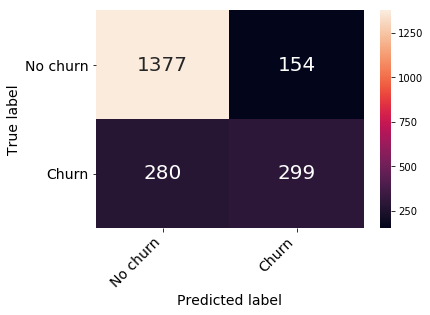

In [106]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)
 
test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))
print('Lift score: {:.2f}'.format(lift_score(test_y, test_y_pred)))

 
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)


### We got 82% classification accuracy from our logistic regression classifier. But the precision and recall for predictions in the positive class (churn) are relatively low, which suggests our data set may be imbalanced.

### 3.2SVM


In [100]:
clf = SVC(gamma='auto')
clf.fit(train_x, train_y) 
test_y_pred = clf.predict(test_x)
print('Lift score: {:.2f}'.format(lift_score(test_y, test_y_pred)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(test_x, test_y)))

Lift score: 2.47
Accuracy of SVM classifier on test set: 0.79


### 3.3 ANN

In [99]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(train_x, train_y) 
test_y_pred = clf.predict(test_x)
print('Lift score: {:.2f}'.format(lift_score(test_y, test_y_pred)))
print('Accuracy of ANN classifier on test set: {:.2f}'.format(clf.score(test_x, test_y)))

Lift score: 2.39
Accuracy of ANN classifier on test set: 0.79


### 3.4 Upsampling the minority class and training Logistic Regression

In [84]:
telcom1['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [85]:
data_majority = telcom1[telcom1['Churn']==0]
data_minority = telcom1[telcom1['Churn']==1]
 
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5163, #same number of samples as majority classe
random_state=1) #set the seed for random resampling
# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
data_upsampled['Churn'].value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [86]:
train, test = train_test_split(data_upsampled, test_size = 0.2)
train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']
 
train_x_upsampled = train
train_x_upsampled=train_x_upsampled.drop('Churn', axis=1)
test_x_upsampled = test
test_x_upsampled=test_x_upsampled.drop('Churn', axis=1)
 
logisticRegr_balanced = LogisticRegression()
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)
 
test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr_balanced.score(test_x_upsampled, test_y_upsampled)))
print(classification_report(test_y_upsampled, test_y_pred_balanced))

Accuracy of logistic regression classifier on test set: 0.77
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1043
           1       0.75      0.81      0.78      1023

   micro avg       0.77      0.77      0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



/home/palak/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



The overall accuracy of the model has decreased, but the precision and recall scores for predicting a churn have improved.

### 3.2 Decision Trees

In [94]:

 
# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)
 
# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=train_x, y=train_y)
decisionTree = decisionTree.fit(X=train_x, y=train_y)
 
# Generate PDF visual of decision tree
churnTree = tree.export_graphviz(decisionTree, out_file=None, 
                         feature_names = list(train_x.columns.values),  
                         class_names = ['No churn', 'Churn'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(churnTree)
graph.render('decision_tree.gv', view=True)


'decision_tree.gv.pdf'

In [107]:
test_y_pred_dt = decisionTree.predict(test_x)
print(test_y_pred_dt)
x= decisionTree.predict_proba(test_x)
print(x[0])
print('Lift score: {:.2f}'.format(lift_score(test_y, test_y_pred_dt)))
print('Accuracy of decision tree unpruned classifier on test set: {:.2f}'.format(decisionTree.score(test_x, test_y)))

[0 0 0 ... 0 0 0]
[0.99107143 0.00892857]
Lift score: 2.31
Accuracy of decision tree unpruned classifier on test set: 0.79


### 3.3 Random Forest

In [96]:
randomForest = RandomForestClassifier()
randomForest.fit(train_x, train_y)
test_y_pred = randomForest.predict(test_x)
print('Lift score: {:.2f}'.format(lift_score(test_y, test_y_pred)))
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x, test_y)))

Lift score: 2.28
Accuracy of random forest classifier on test set: 0.77


/home/palak/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



### 3.4 Balanced Random Forest ( By upsampling)

In [97]:
randomForest = RandomForestClassifier()
randomForest.fit(train_x_upsampled, train_y_upsampled)
test_y_pred = randomForest.predict(test_x)
print('Lift score: {:.2f}'.format(lift_score(test_y, test_y_pred)))
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x_upsampled, test_y_upsampled)))

Lift score: 3.30
Accuracy of random forest classifier on test set: 0.88


/home/palak/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



### Weighted Random Forest 

In [108]:
RF = RandomForestClassifier(class_weight={0: .25, 1: .35})
RF.fit(train_x, train_y)
test_y_pred = RF.predict(test_x)
print('Lift score: {:.2f}'.format(lift_score(test_y, test_y_pred)))
print('Accuracy of random forest classifier on test set: {:.2f}'.format(RF.score(test_x, test_y)))

/home/palak/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



Lift score: 2.30
Accuracy of random forest classifier on test set: 0.77


## Random Forest from scratch